In [ ]:
#Data Set import into google colab
from google.colab import files

#data management & basic modules
import pandas as pd
import numpy as np
from math import sqrt

#sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Graphing
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
#Here we install Kaggle
!pip install -q kaggle
#Use the Files.upload feature
files.upload()
#Make a directory/folder for the kaggle.json
!mkdir ~/.kaggle
#Copy the Kaggle.json
!cp kaggle.json ~/.kaggle/
#Set edit permissions
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
#Downloading the dataset
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression

  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 1.25MB/s]


In [ ]:
#Make a directory/folder called data for saving the dataset and then unzip it
!mkdir data
!unzip salary-dataset-simple-linear-regression -d data
#Checking the data
!ls -lh data

Archive:  salary-dataset-simple-linear-regression.zip
  inflating: data/Salary_dataset.csv  
total 4.0K
-rw-r--r-- 1 root root 664 Jan 10  2023 Salary_dataset.csv


In [ ]:
#Dropping missing values after reading the dataset
df = pd.read_csv("/content/data/Salary_dataset.csv")
df.dropna(inplace = True)

In [ ]:
#The linear regression model is being created
model = LinearRegression(fit_intercept=True)
#The input features and target features are being prepared
X = df[['YearsExperience']]
X.columns = ['YearsExperience']
y = df['Salary']
#Model is being fitted
model.fit(X,y)

LinearRegression()

In [ ]:
#Coefficients are being inputted and are being outputted
coefficients = model.coef_
print(f"Coefficients: {coefficients}")

Coefficients: [9449.96232146]


In [ ]:
#Predictions
new_X = [[6], [12], [18]]
predictions = model.predict(new_X)
print(predictions)

[ 81547.97789525 138247.75182398 194947.52575271]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
feature_names = ['YearsExperience']
model.fit(df[feature_names], df['Salary'])

LinearRegression()

In [ ]:
model = LinearRegression(fit_intercept=True, copy_X=True, n_jobs=1)
model.fit(X, y, sample_weight=None)

LinearRegression(n_jobs=1)

In [ ]:
#MSE and R-squared is being calculated
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print("Mean Squared Error: {:.2f}".format(mse))
print("R-squared: {:.2f}".format(r2))

Mean Squared Error: 31270951.72
R-squared: 0.96


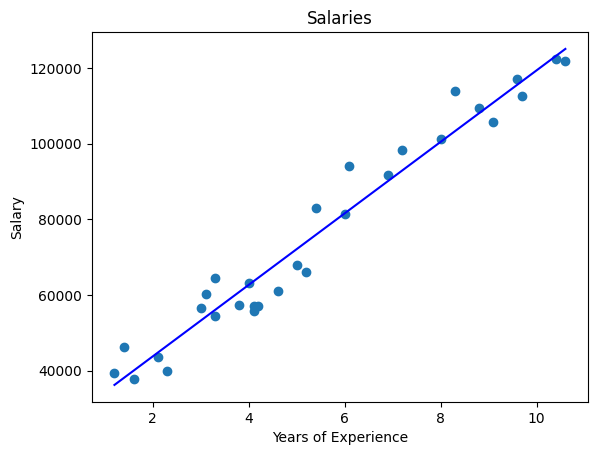

In [ ]:
#The data is being visualized as well as the predictions
import matplotlib.pyplot as plt
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salaries')
plt.show()

Here I have updated this and included a few more models using different algorithms.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import sklearn.tree

In [ ]:
# Create the decision tree regressor model
regressor = DecisionTreeRegressor()
# Train the model on the training data
regressor.fit(X, y)

DecisionTreeRegressor()

In [ ]:
# Make predictions on the training and test sets
y_train_pred = regressor.predict(X)
y_test_pred = regressor.predict(X)

# Calculate the accuracy on the training and test sets
train_accuracy = regressor.score(X, y)
test_accuracy = regressor.score(X, y)

# Print the results
print("Training accuracy:", train_accuracy*100)
print("Test accuracy:", test_accuracy*100)

Training accuracy: 99.76748641432847
Test accuracy: 99.76748641432847


[Text(0.4817073170731707, 0.95, 'x[0] <= 5.3\nsquared_error = 726499261.733\nsamples = 30\nvalue = 76004.0'),
 Text(0.23170731707317074, 0.85, 'x[0] <= 2.65\nsquared_error = 88456323.003\nsamples = 17\nvalue = 54571.235'),
 Text(0.0975609756097561, 0.75, 'x[0] <= 1.5\nsquared_error = 9510987.2\nsamples = 5\nvalue = 41340.0'),
 Text(0.04878048780487805, 0.65, 'x[0] <= 1.3\nsquared_error = 11771761.0\nsamples = 2\nvalue = 42775.0'),
 Text(0.024390243902439025, 0.55, 'squared_error = 0.0\nsamples = 1\nvalue = 39344.0'),
 Text(0.07317073170731707, 0.55, 'squared_error = 0.0\nsamples = 1\nvalue = 46206.0'),
 Text(0.14634146341463414, 0.65, 'x[0] <= 1.85\nsquared_error = 5715776.889\nsamples = 3\nvalue = 40383.333'),
 Text(0.12195121951219512, 0.55, 'squared_error = 0.0\nsamples = 1\nvalue = 37732.0'),
 Text(0.17073170731707318, 0.55, 'x[0] <= 2.2\nsquared_error = 3301489.0\nsamples = 2\nvalue = 41709.0'),
 Text(0.14634146341463414, 0.45, 'squared_error = 0.0\nsamples = 1\nvalue = 43526.0'),

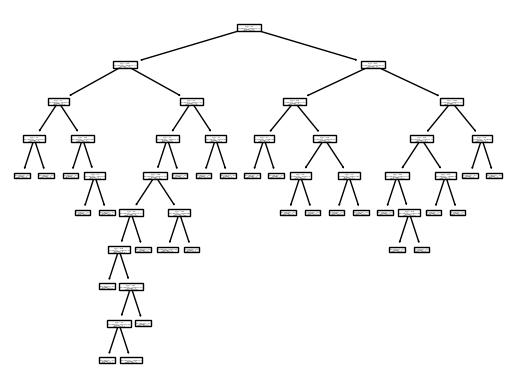

In [ ]:
#Here we plot the decision tree which is not perfectly able to be seen but can be seen in the pdf version/format that is set
sklearn.tree.plot_tree(regressor)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Here we set up the random forest regressor and store it as a variable
forest = RandomForestRegressor()
#Here we pass in the train values
forest.fit(X, y)

RandomForestRegressor()

In [ ]:
# Make predictions on the training and test sets
y_train_pred = forest.predict(X)
y_test_pred = forest.predict(X)

# Calculate the accuracy on the training and test sets
train_accuracy = forest.score(X, y)
test_accuracy = forest.score(X, y)

# Print the results
print("Training accuracy:", train_accuracy*100)
print("Test accuracy:", test_accuracy*100)

Training accuracy: 99.17852270388995
Test accuracy: 99.17852270388995
